In [15]:
!pip install dagster dagster-webserver pandas numpy matplotlib seaborn scikit-learn


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from dagster import op, job


In [17]:
from google.colab import files

uploaded = files.upload()


Saving Students Social Media Addiction.csv to Students Social Media Addiction (2).csv


In [34]:
@op
def load_data():
    df = pd.read_csv("Students Social Media Addiction.csv")
    return df


In [19]:
@op
def eda(df):
    print(df.head())
    print(df.info())

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Numeric columns → histogram as bars
    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        df[col].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

    # Categorical columns → bar charts
    for col in categorical_cols:
        plt.figure(figsize=(6,4))
        df[col].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

    return df


In [37]:
@op
def preprocess(df):
    encoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = encoder.fit_transform(df[col])

    X = df.drop("Addicted_Score", axis=1)
    y = df["Addicted_Score"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test


In [35]:
@op
def train_models(data):
    X_train, X_test, y_train, y_test = data

    results = {}

    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    results["Decision Tree"] = accuracy_score(y_test, dt.predict(X_test))

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    results["Random Forest"] = accuracy_score(y_test, rf.predict(X_test))

    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    results["Logistic Regression"] = accuracy_score(y_test, lr.predict(X_test))

    return results


In [40]:
# Re-run Random Forest with new parameters only
rf_new = RandomForestClassifier(
    n_estimators=400,
    max_depth=15,
    min_samples_split=5,
    random_state=42
)

rf_new.fit(X_train, y_train)
rf_new_acc = accuracy_score(y_test, rf_new.predict(X_test))
print("Re-run Random Forest Accuracy:", rf_new_acc)

Re-run Random Forest Accuracy: 0.9787234042553191


In [22]:
@op
def visualize_results(results):
    names = list(results.keys())
    scores = list(results.values())

    plt.figure(figsize=(6,4))
    plt.bar(names, scores, color=['skyblue', 'lightgreen', 'salmon'])
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy Comparison")
    plt.ylim(0, 1)
    plt.show()


In [23]:
@job
def social_media_pipeline():
    data = load_data()
    clean = eda(data)
    processed = preprocess(clean)
    results = train_models(processed)
    visualize_results(results)


2026-01-29 03:04:21 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - RUN_START - Started execution of run for "social_media_pipeline".
2026-01-29 03:04:21 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - ENGINE_EVENT - Executing steps in process (pid: 639)
2026-01-29 03:04:21 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - RESOURCE_INIT_STARTED - Starting initialization of resources [io_manager].
2026-01-29 03:04:21 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - RESOURCE_INIT_SUCCESS - Finished initialization of resources [io_manager].
2026-01-29 03:04:21 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - LOGS_CAPTURED - Started capturing logs in process (pid: 639).
2026-01-29 03:04:21 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

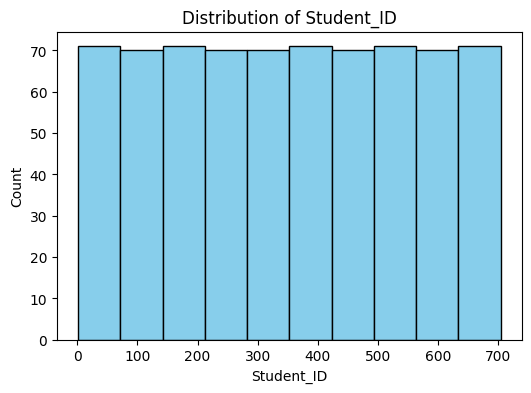

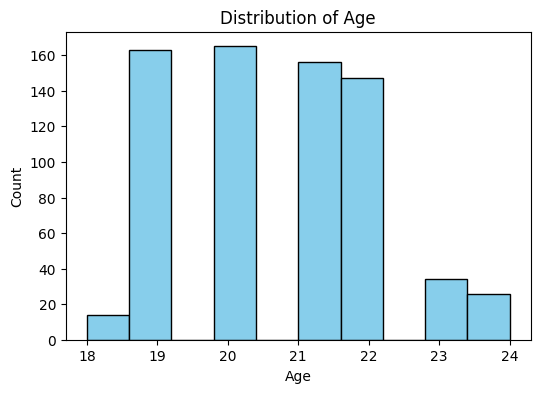

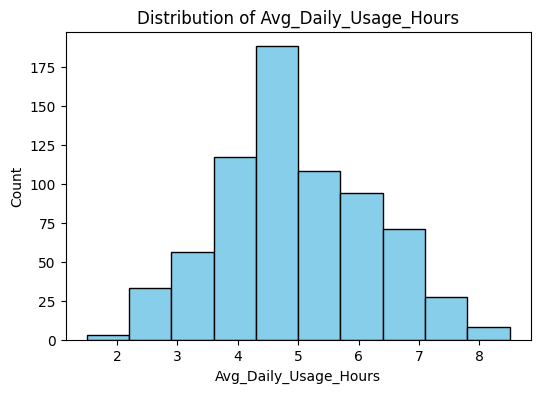

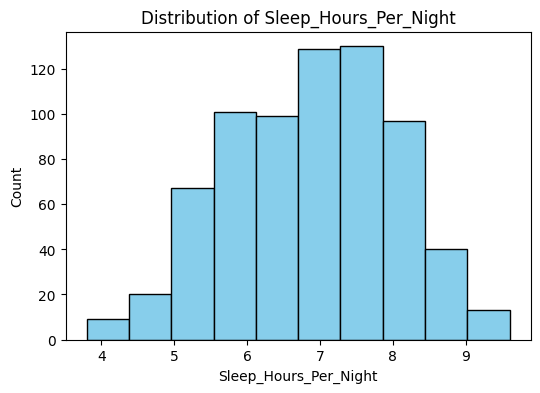

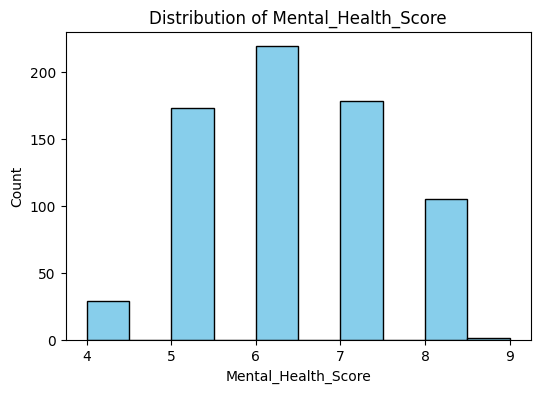

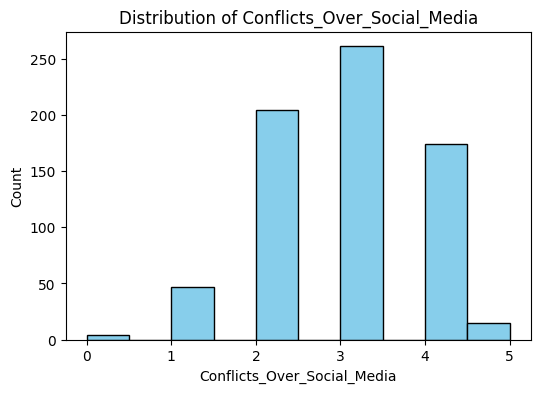

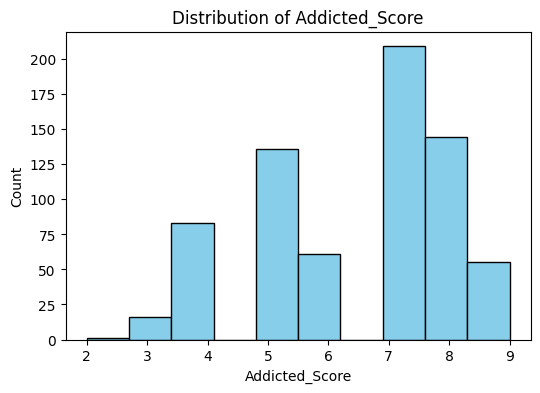

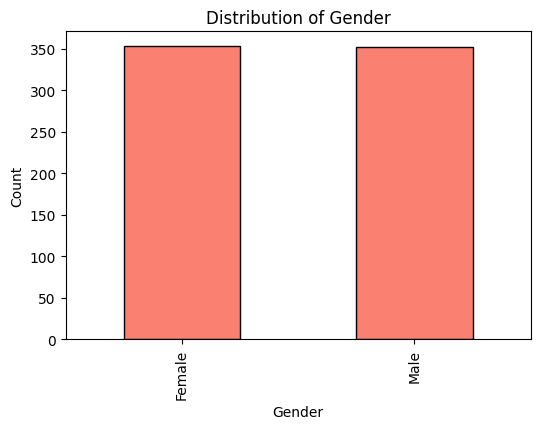

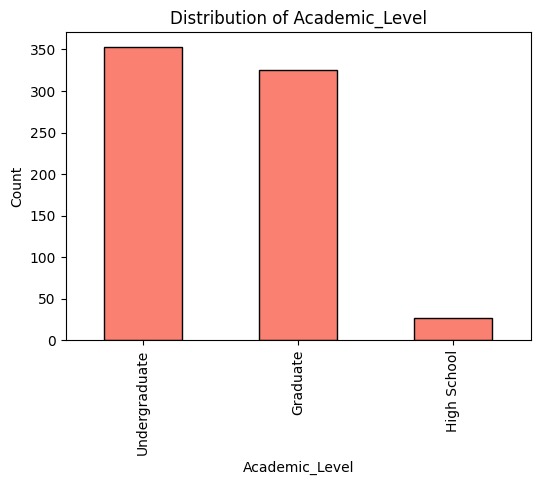

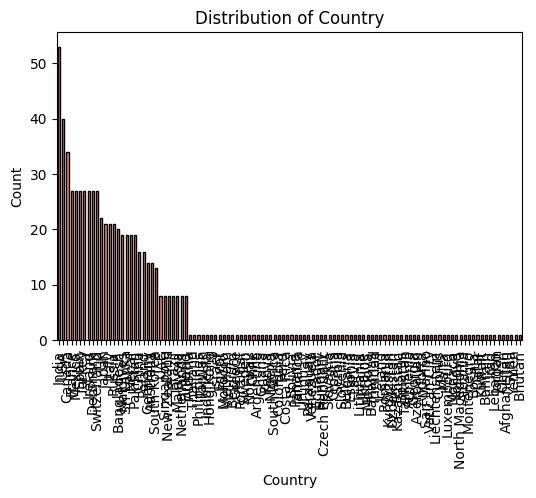

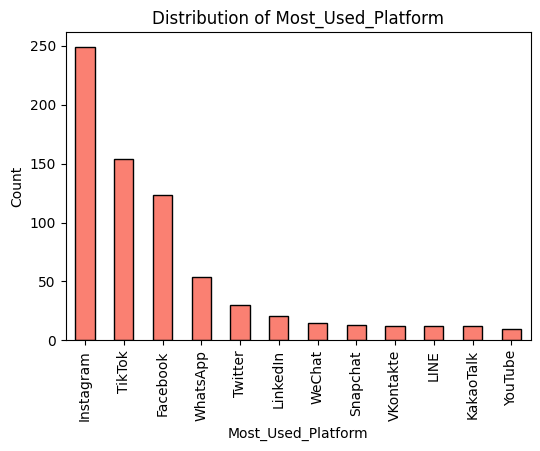

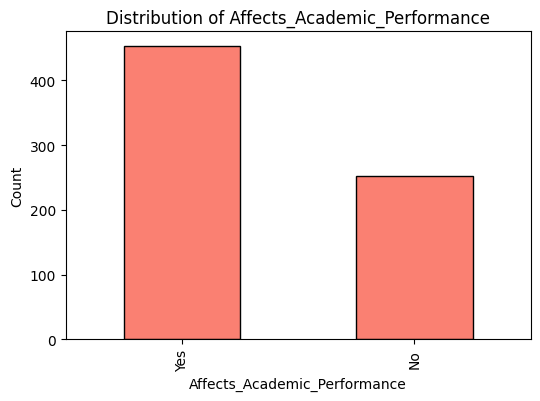

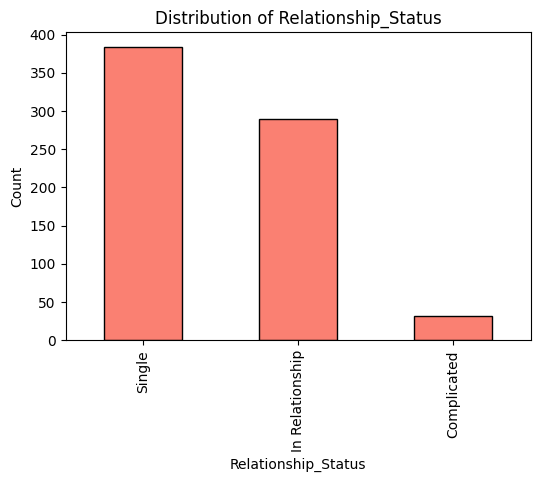

2026-01-29 03:04:23 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - eda - STEP_OUTPUT - Yielded output "result" of type "Any". (Type check passed).
2026-01-29 03:04:23 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - eda - HANDLED_OUTPUT - Handled output "result" using IO manager "io_manager"
2026-01-29 03:04:23 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - eda - STEP_SUCCESS - Finished execution of step "eda" in 2.32s.
2026-01-29 03:04:23 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - preprocess - STEP_START - Started execution of step "preprocess".
2026-01-29 03:04:23 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - preprocess - LOADED_INPUT - Loaded input "df" using input manager "io_manager", from output "result" of step "eda"
2026-01-29 03:04:23 +00

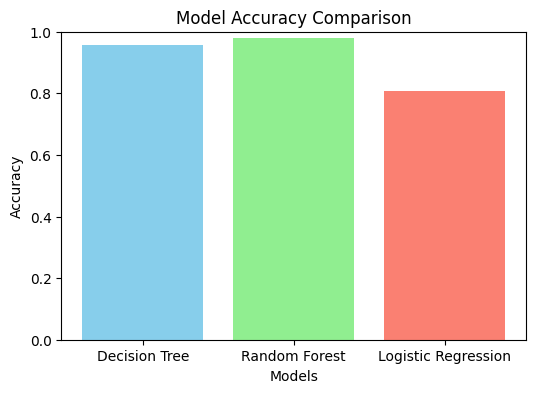

2026-01-29 03:04:26 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - visualize_results - STEP_OUTPUT - Yielded output "result" of type "Any". (Type check passed).
2026-01-29 03:04:26 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - visualize_results - HANDLED_OUTPUT - Handled output "result" using IO manager "io_manager"
2026-01-29 03:04:26 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - visualize_results - STEP_SUCCESS - Finished execution of step "visualize_results" in 339ms.
/usr/local/lib/python3.12/dist-packages/dagster/_core/execution/context_creation_job.py:276: RuntimeWarning: coroutine 'BaseEventLoop.shutdown_asyncgens' was never awaited
  pass
2026-01-29 03:04:26 +0000 - dagster - DEBUG - social_media_pipeline - 743f0db2-4867-4c80-ae17-4cf9ef5c247f - 639 - ENGINE_EVENT - Finished steps in process (pid: 639) in 5.15s
2026-01-29 03:04:26 +00

In [24]:
social_media_pipeline.execute_in_process()
